In [1]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from dotenv import load_dotenv
import os
from datetime import datetime

# Load environment variables
load_dotenv()

# Connect to MongoDB
mongo_client = pymongo.MongoClient(os.getenv("MONGODB_CS"))
db = mongo_client["reddit_mental_health"]
processed_collection = db["processed_chunks"]

In [2]:
# Fetch data into DataFrame
processed_df = pd.DataFrame(list(processed_collection.find({})))

In [10]:
# Visualization functions
def plot_subreddit_distribution(df):
    subreddit_counts = df['subreddit'].value_counts().head(15)
    plt.figure(figsize=(10, 6))
    subreddit_counts.plot(kind='bar', color='skyblue')
    plt.title('Subreddits by Content Volume')
    plt.xlabel('Subreddit')
    plt.ylabel('Number of Chunks')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show('subreddit_distribution.png')


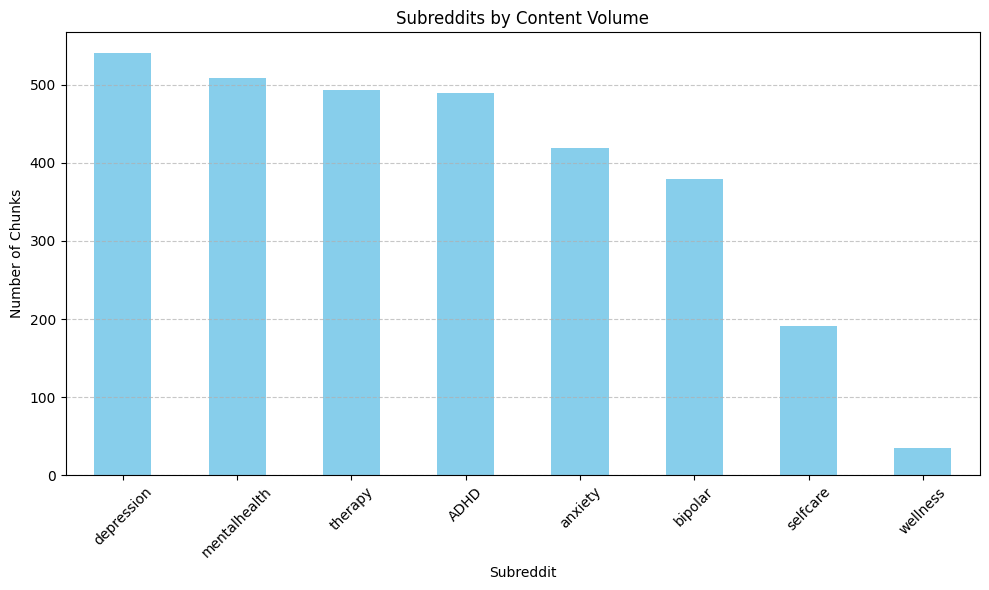

In [11]:
plot_subreddit_distribution(processed_df)


In [18]:
def plot_sentiment_distribution(df):
    sentiments = df['features'].apply(lambda x: x.get('sentiment_polarity', 0))

    plt.figure(figsize=(8, 4))
    plt.hist(sentiments, bins=30, color='purple', alpha=0.7)
    plt.title('Sentiment Polarity Distribution')
    plt.xlabel('Sentiment Score (-1 to 1)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axvline(x=0, color='red', linestyle='--')
    plt.tight_layout()
    plt.show('sentiment_distribution.png')

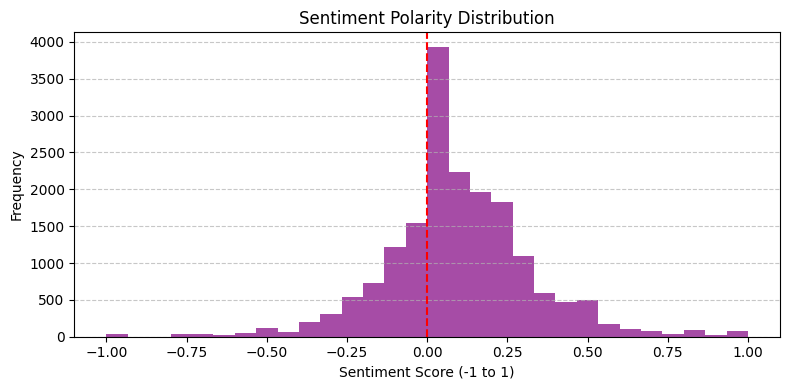

In [19]:
plot_sentiment_distribution(processed_df)

In [16]:
def plot_crisis_content(df):
    crisis_counts = df['metadata'].apply(lambda x: x.get('is_crisis_flagged', False)).value_counts()

    plt.figure(figsize=(5, 5))
    plt.pie(crisis_counts,
            labels=['Non-Crisis', 'Crisis'],
            colors=['lightgreen', 'salmon'],
            autopct='%1.1f%%',
            startangle=90,
            shadow=True)
    plt.title('Crisis vs Non-Crisis Content Distribution')
    plt.show('crisis_content_distribution.png')

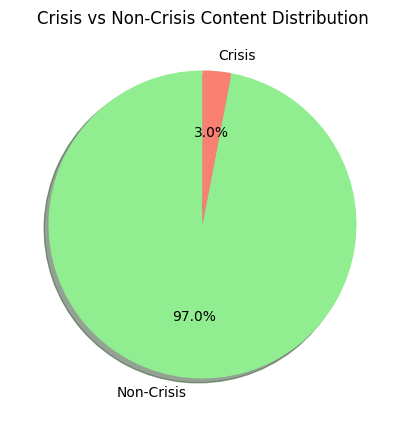

In [17]:
plot_crisis_content(processed_df)

In [38]:
def generate_word_cloud(df):
    crisis_df = df[df['metadata'].apply(lambda x: x.get('is_crisis_flagged', False))]
    if not crisis_df.empty:
        crisis_text = ' '.join(crisis_df['text'])
        wordcloud = WordCloud(width=1000,
                            height=600,
                            background_color='white',
                            colormap='Accent',
                            max_words=100).generate(crisis_text)

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Most Frequent Words in Crisis Content')
        plt.show('crisis_wordcloud.png')

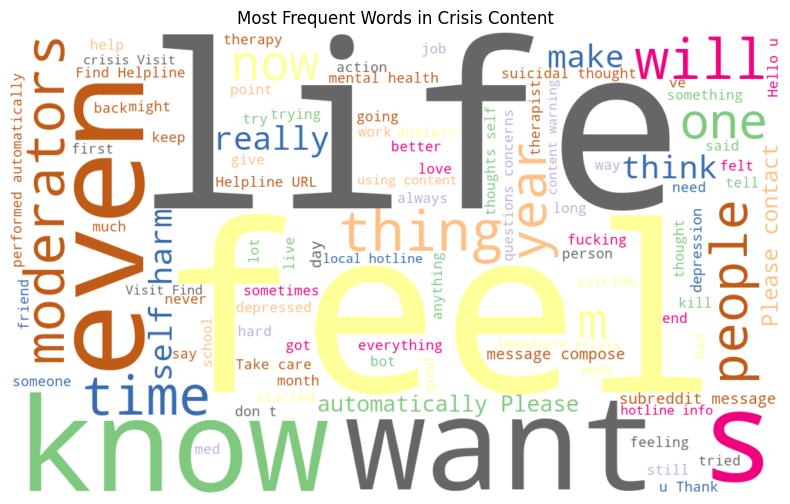

In [27]:
generate_word_cloud(processed_df)

In [32]:
def plot_temporal_patterns(df):
    def get_hour(x):
        if 'created_datetime' in x and x['created_datetime']:
            try:
                return datetime.fromisoformat(x['created_datetime']).hour
            except:
                return None
        return None

    df['hour'] = df['metadata'].apply(get_hour)
    hourly_counts = df['hour'].dropna().value_counts().sort_index()

    if not hourly_counts.empty:
        plt.figure(figsize=(12, 6))
        hourly_counts.plot(kind='bar', color='teal')
        plt.title('Posting Activity by Hour of Day')
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Posts/Comments')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show('temporal_patterns.png')


In [34]:
 plot_temporal_patterns(processed_df)

In [31]:
def plot_topic_frequency(df):
    topics = ['anxiety', 'depression', 'therapy', 'coping', 'relationships', 'work_life']
    topic_counts = {}

    for topic in topics:
        key = f'{topic}_mentions'
        topic_counts[topic] = df['features'].apply(
            lambda x: 1 if key in x and x[key] > 0 else 0
        ).sum()

    plt.figure(figsize=(12, 6))
    plt.bar(topic_counts.keys(), topic_counts.values(), color='orange')
    plt.title('Mental Health Topic Frequency')
    plt.xlabel('Topic')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show('topic_frequency.png')

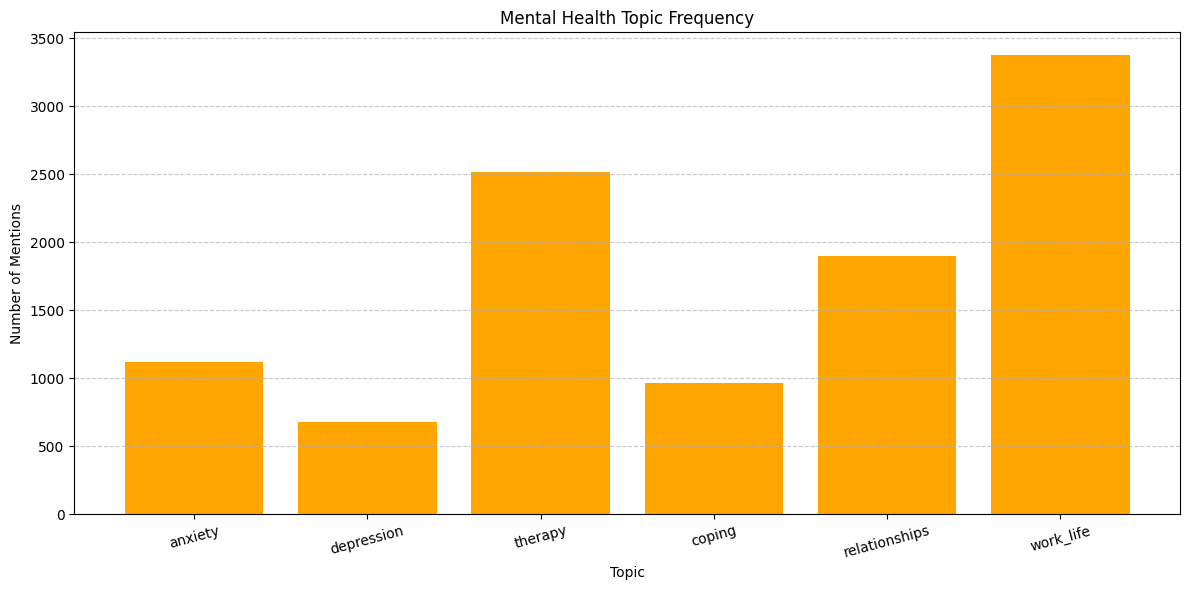

In [35]:
plot_topic_frequency(processed_df)

In [36]:

def plot_text_length(df):
    word_counts = df['features'].apply(lambda x: x.get('word_count', 0))

    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=50, color='skyblue', alpha=0.7)
    plt.title('Text Chunk Length Distribution')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axvline(x=np.mean(word_counts), color='red', linestyle='--', label=f'Mean: {np.mean(word_counts):.1f}')
    plt.legend()
    plt.tight_layout()
    plt.show('text_length.png')

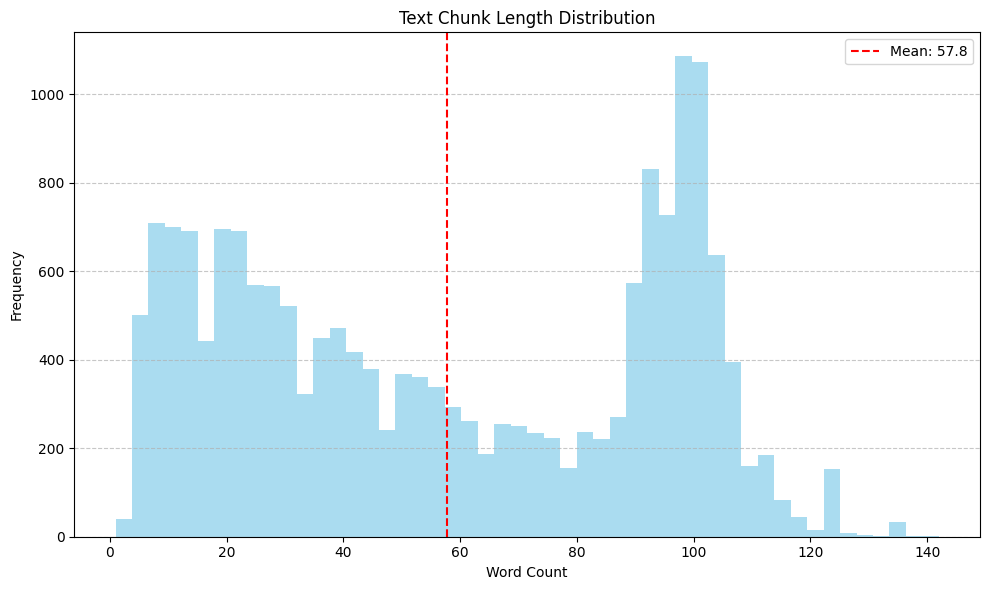

In [37]:
plot_text_length(processed_df)